In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn import svm, metrics
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

In [5]:
defaults = pd.read_csv("defaults.csv", sep = ";")
defaults.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [6]:
defaults.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,27999.00000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000,...,27999.000000,27999.000000,27999.000000,27999.000000,2.799900e+04,27999.000000,27999.000000,27999.000000,27999.000000,27999.000000
mean,14000.00000,167099.170685,1.604557,1.845780,1.556484,35.380264,-0.010572,-0.130112,-0.163292,-0.217472,...,43222.489696,40387.979856,38903.331155,5579.850923,5.847387e+03,5131.236580,4813.350048,4755.416801,5184.075574,0.221794
std,8082.75943,129742.554832,0.488954,0.785705,0.521295,9.276226,1.122965,1.194718,1.195233,1.163331,...,64235.169551,60759.487603,59435.211063,15162.343572,2.105127e+04,16606.364862,15307.325671,14887.656280,17602.985657,0.415460
min,1.00000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7000.50000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2378.000000,1799.500000,1268.000000,1000.000000,8.395000e+02,390.000000,295.000000,264.000000,109.000000,0.000000
50%,14000.00000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19129.000000,18239.000000,17212.000000,2100.000000,2.008000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,20999.50000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54391.000000,50150.500000,49165.500000,5005.000000,5.000000e+03,4500.000000,4010.000000,4026.500000,4000.000000,0.000000
max,27999.00000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,505000.000000,1.684259e+06,896040.000000,528897.000000,417990.000000,528666.000000,1.000000


In [10]:
defaults.isnull().sum()[defaults.isnull().sum() > 0].count()

0

In [11]:
class_counts = defaults['default payment next month'].value_counts()

proportion = class_counts[1] / class_counts[0]
proportion

0.2850061957868649

CZYSZCZENIE DANYCH:

In [12]:
defaults["SEX"] = defaults["SEX"].replace({2: 1, 1: 0})
defaults["EDUCATION"] = defaults["EDUCATION"].replace({5: 4, 6: 4})

In [13]:
columns_to_exclude = ['ID']
defaults_selected = defaults.drop(columns=columns_to_exclude)

defaults_selected.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,1,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,1,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,1,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,1,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,0,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,0,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,0,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,1,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,1,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,0,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


STANDARYZACJA

In [14]:
num_cols = [
    "LIMIT_BAL", "AGE",
    "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
    "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
    "PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"
]

scaler = StandardScaler()

Ograniczenie zbioru do 2000 losowo wybranych rekordów.

In [15]:
smlpDFl = defaults_selected.sample(n=2000)

PRZYGOTOWANIE DANYCH DO MODELOWANIA

In [16]:
X = smlpDFl.drop(columns=["default payment next month"])  # cechy
y = smlpDFl["default payment next month"]  # klasa decyzyjna

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


print(X_train_scaled.shape, X_test_scaled.shape)

print(X_train_scaled, X_test_scaled)
print(y_train, y_test)

(1400, 23) (600, 23)
[[ 2.53698011 -1.29099445 -1.15839639 ... -0.18580298 -0.21743792
   0.51647679]
 [ 2.68947559 -1.29099445  0.22064693 ... -0.28640752 -0.33676863
  12.34885925]
 [-0.66542491  0.77459667  1.59969025 ... -0.32055457 -0.3442268
  -0.30028146]
 ...
 [ 0.85952986  0.77459667 -1.15839639 ... -0.32055457 -0.3442268
  -0.30028146]
 [-0.20793848  0.77459667  0.22064693 ... -0.32055457 -0.27971363
  -0.25204426]
 [ 1.92699821  0.77459667  0.22064693 ...  8.04615188 -0.13987296
  -0.17164891]] [[-1.12291134 -1.29099445  0.22064693 ... -0.18451056  0.02868167
  -0.30028146]
 [ 1.54575951  0.77459667  1.59969025 ... -0.32055457 -0.3442268
  -0.30028146]
 [-0.66542491  0.77459667  0.22064693 ... -0.18451056 -0.3442268
  -0.30028146]
 ...
 [ 0.24954796  0.77459667  0.22064693 ...  0.01955545  0.02868167
   0.05053459]
 [ 1.92699821  0.77459667 -1.15839639 ... 13.88386825  0.36489594
   1.5858226 ]
 [-0.51292943  0.77459667 -1.15839639 ... -0.08247755 -0.06827453
  -0.09897152]]

KLASYFIKATOR SVM

In [18]:
mdl = svm.SVC(C = 1, kernel = 'rbf')
resSVM = mdl.fit(X_train_scaled, y_train)

predictions = resSVM.predict(X_test_scaled)

print(metrics.confusion_matrix(y_test, predictions))
print(metrics.classification_report(y_test, predictions))

[[439  26]
 [ 95  40]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.88       465
           1       0.61      0.30      0.40       135

    accuracy                           0.80       600
   macro avg       0.71      0.62      0.64       600
weighted avg       0.77      0.80      0.77       600



In [19]:
metrics.accuracy_score(y_test, predictions)

0.7983333333333333

In [20]:
metrics.balanced_accuracy_score(y_test, predictions)

0.6201911589008363

In [21]:
parameters = dict()
parameters["C"] = [0.1, 0.5, 1, 2, 5, 10, 50]
parameters["gamma"] = [0.01, 0.05, 0.1,  1, 10, 50]

cv = KFold(n_splits=10, shuffle=True)
mdl = svm.SVC()

gridMdl = GridSearchCV(mdl, parameters, scoring='accuracy', cv=cv, refit=True)
resMdls = gridMdl.fit(X_train_scaled, y_train)

bestMdl = resMdls.best_estimator_
bestMdl

best_predictions = bestMdl.predict(X_test_scaled)

print(bestMdl)
print(metrics.confusion_matrix(y_test, best_predictions))
print(metrics.classification_report(y_test, best_predictions))


SVC(C=2, gamma=0.01)
[[442  23]
 [ 96  39]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       465
           1       0.63      0.29      0.40       135

    accuracy                           0.80       600
   macro avg       0.73      0.62      0.64       600
weighted avg       0.78      0.80      0.77       600



KRZYWA ROC

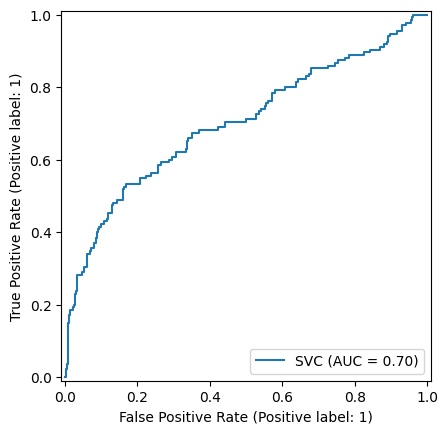

In [22]:
RocCurveDisplay.from_estimator(bestMdl, X_test_scaled, y_test)
plt.show()

WALIDACJA

In [23]:
defaults_valid = pd.read_csv("defaults_valid.csv", sep = ";")

defaults_valid["SEX"] = defaults_valid["SEX"].replace({2: 1, 1: 0})
defaults_valid["EDUCATION"] = defaults_valid["EDUCATION"].replace({5: 4, 6: 4})

columns_to_exclude_v = ['ID']
defaults_selected_v = defaults_valid.drop(columns=columns_to_exclude_v)

defaults_selected_v.head(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,90000,1,4,2,31,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
1,30000,1,2,1,29,1,2,2,2,0,...,28700,28300,25520,0,3500,0,0,1000,0,1
2,150000,1,1,2,29,0,0,0,0,0,...,105989,98836,94504,5200,7982,4500,4048,3800,3818,0
3,230000,1,1,2,29,2,-1,-1,-1,-1,...,711,711,291,711,711,711,711,291,1131,0
4,510000,1,1,2,30,-1,-1,-1,-1,0,...,163628,117475,116656,493358,1227082,164577,510,6239,4550,0
5,20000,1,2,2,30,1,2,0,0,0,...,7886,19786,20025,0,7027,1000,19000,6000,1000,1
6,150000,1,1,2,27,0,0,0,0,0,...,62283,60942,55878,30000,20142,3759,7022,20000,10000,0
7,110000,1,2,2,24,0,0,0,0,0,...,11472,13267,15048,2000,2000,2000,2000,2000,0,0
8,250000,1,2,1,25,0,0,0,0,0,...,22408,20610,17978,2000,1790,1250,700,644,1000,0
9,240000,1,1,3,29,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


In [24]:
X_valid = defaults_selected_v.drop(columns=["default payment next month"])
y_valid = defaults_selected_v["default payment next month"]


X_valid_scaled = scaler.fit_transform(X_valid)

In [25]:
valid_predictions = bestMdl.predict(X_valid_scaled)

print(metrics.confusion_matrix(y_valid, valid_predictions))
print(metrics.classification_report(y_valid, valid_predictions))
print(metrics.balanced_accuracy_score(y_valid, valid_predictions))

[[1513   62]
 [ 289  137]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1575
           1       0.69      0.32      0.44       426

    accuracy                           0.82      2001
   macro avg       0.76      0.64      0.67      2001
weighted avg       0.81      0.82      0.80      2001

0.641115582383188


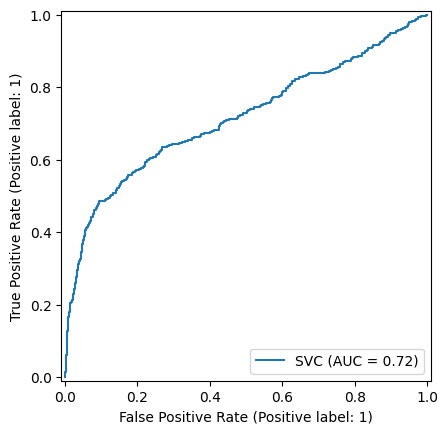

In [26]:
RocCurveDisplay.from_estimator(bestMdl, X_valid_scaled, y_valid)
plt.show()